In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl

ball_data = pd.read_csv('/content/drive/My Drive/dataset1/Ball_by_Ball.csv')
match = pd.read_csv('/content/drive/My Drive/dataset1/Match.csv')
player = pd.read_csv('/content/drive/My Drive/dataset1/Player.csv')
player_mat = pd.read_csv('/content/drive/My Drive/dataset1/Player_Match.csv')
season = pd.read_csv('/content/drive/My Drive/dataset1/Season.csv')
team = pd.read_csv('/content/drive/My Drive/dataset1/Team.csv')

In [4]:
ball_data

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,5,1,2,2,2,1,14,0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136585,981024,2,20,2,2,11,369,6,434,299,2,,,,,
136586,981024,2,20,3,2,11,369,6,434,299,0,,,434,run out,183
136587,981024,2,20,4,2,11,140,9,369,299,0,legbyes,1,,,
136588,981024,2,20,5,2,11,369,6,140,299,1,,,,,


In [5]:
ball_data['Dissimal_Type'] = np.where(ball_data['Dissimal_Type']==' ','NAN',ball_data['Dissimal_Type'])
ball_data['Dissimal_Type'] = np.where(ball_data['Dissimal_Type']=='run out','NAN',ball_data['Dissimal_Type'])
ball_data['Dissimal_Type'] = np.where(ball_data['Dissimal_Type']=='obstructing the field','NAN',ball_data['Dissimal_Type'])

wickets_df = ball_data[ball_data['Dissimal_Type'] != 'NAN']

In [6]:
ball_data.Dissimal_Type.unique()

array(['NAN', 'caught', 'bowled', 'lbw', 'retired hurt', 'stumped',
       'caught and bowled', 'hit wicket'], dtype=object)

In [7]:
wickets_df

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
33,335987,1,6,2,1,2,1,1,2,15,0,,,1,caught,9
74,335987,1,13,1,1,2,3,3,2,9,0,,,3,caught,14
106,335987,1,18,1,1,2,4,4,2,13,0,,,4,caught,10
131,335987,2,2,1,2,1,6,1,7,84,0,,,6,bowled,
138,335987,2,3,2,2,1,8,3,7,106,0,,,8,bowled,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136532,981024,2,11,3,2,11,162,1,8,385,0,,,162,caught,228
136546,981024,2,13,5,2,11,8,2,110,429,0,,,8,bowled,
136552,981024,2,14,5,2,11,110,3,354,228,0,,,110,caught,163
136562,981024,2,16,3,2,11,354,4,32,385,0,,,354,bowled,


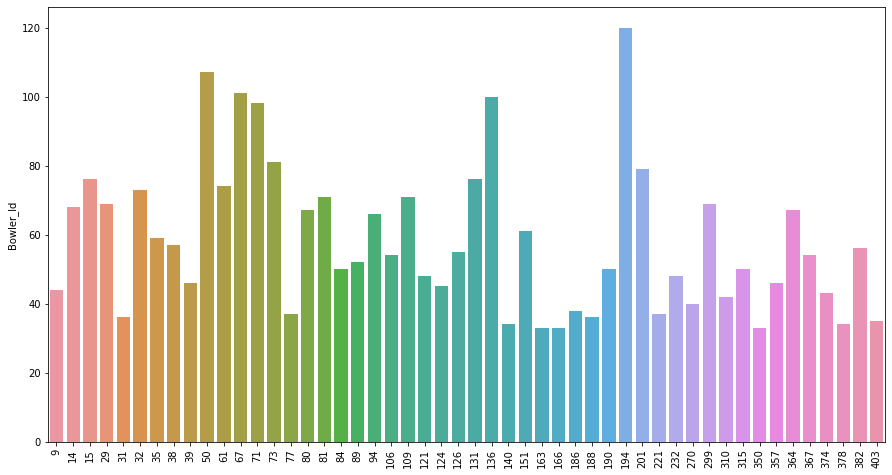

In [8]:
values = wickets_df.Bowler_Id.value_counts().sort_values(ascending=False).head(50)
labels = values.index
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x=labels, y=values)

In [9]:
bow = player.loc[player['Player_Id'].isin(labels)]['Player_Name']

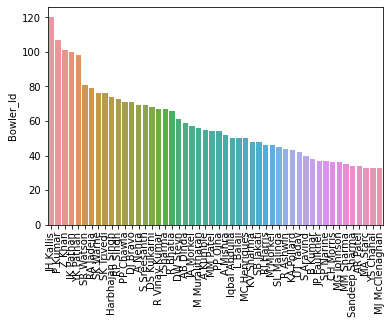

In [10]:
plt.xticks(rotation=90)
sns.barplot(x=bow.values, y=values)

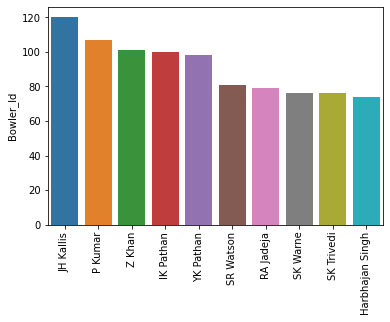

In [11]:
plt.xticks(rotation=90)
sns.barplot(x=bow.values[:10], y=values[:10])

In [12]:
batsman = ball_data[ball_data['Batsman_Scored'] != '0']
batsman.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
8,335987,1,2,2,1,2,2,2,1,15,4,,,,NAN,
9,335987,1,2,3,1,2,2,2,1,15,4,,,,NAN,
10,335987,1,2,4,1,2,2,2,1,15,6,,,,NAN,
11,335987,1,2,5,1,2,2,2,1,15,4,,,,NAN,
16,335987,1,3,4,1,2,2,2,1,14,4,,,,NAN,


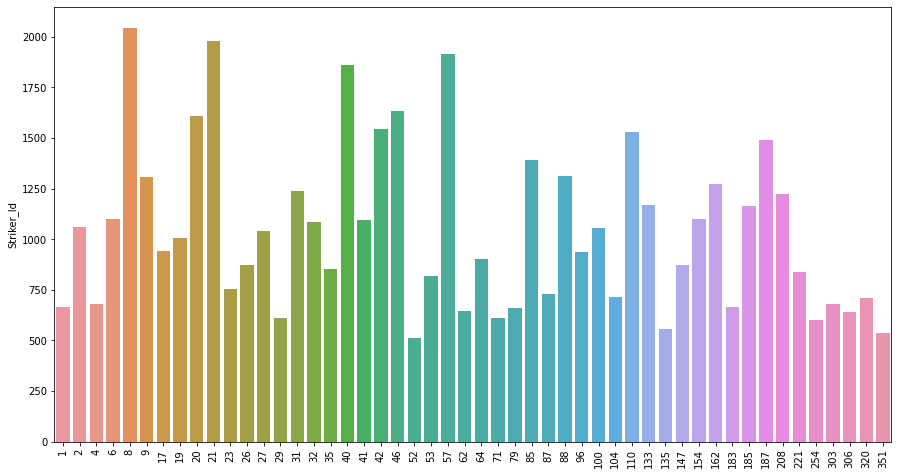

In [13]:
values = batsman.Striker_Id.value_counts().sort_values(ascending=False).head(50)
labels = values.index
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x=labels, y=values)

In [14]:
bat = player.loc[player['Player_Id'].isin(labels)]['Player_Name']

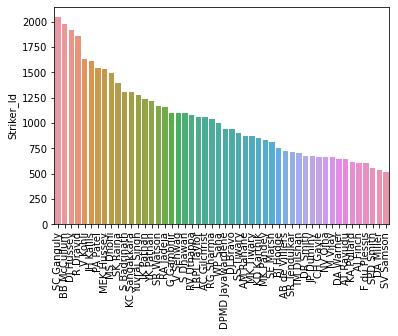

In [15]:
plt.xticks(rotation=90)
sns.barplot(x=bat.values, y=values)

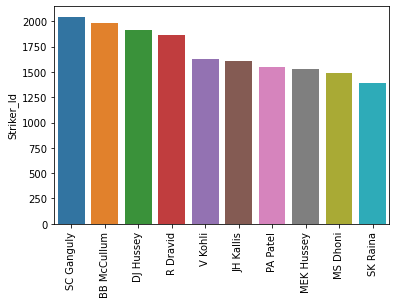

In [16]:
plt.xticks(rotation=90)
sns.barplot(x=bat.values[:10], y=values[:10])

In [17]:
match

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,22-May-16,6,2,9,Shaheed Veer Narayan Singh International Stadium,2,field,0,1,0,by wickets,6.0,2.0,8.0,511,497,Raipur,India
573,981018,24-May-16,13,2,9,M Chinnaswamy Stadium,2,field,0,1,0,by wickets,4.0,2.0,110.0,495,482,Bangalore,India
574,981020,25-May-16,11,1,9,Feroz Shah Kotla,1,field,0,1,0,by runs,22.0,11.0,163.0,481,499,Delhi,India
575,981022,27-May-16,13,11,9,Feroz Shah Kotla,11,field,0,1,0,by wickets,4.0,11.0,187.0,481,498,Delhi,India


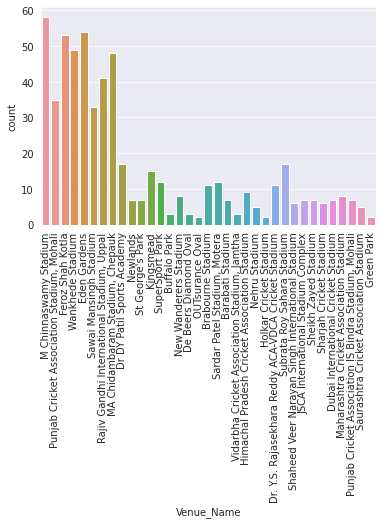

In [18]:
sns.set_style(style='darkgrid')
plt.xticks(rotation=90)
ax = sns.countplot(x="Venue_Name", data=match)

In [19]:
winners = ['RR','DC','CSK','CSK','KKR','MI','KKR','MI','SRH']
Year = ['2008','2009','2010','2011','2012','2013','2014','2015','2016']

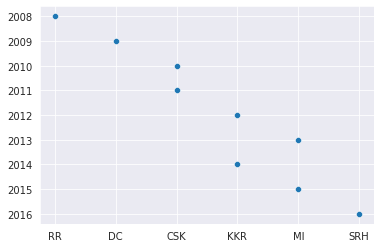

In [20]:
sns.scatterplot(x=winners,y=Year)

In [21]:
player_mat

,Match_Id,Player_Id,Team_Id,Is_Keeper,Is_Captain
0,335987,1,1,0,1
1,335987,2,1,0,0
2,335987,3,1,0,0
3,335987,4,1,0,0
4,335987,5,1,0,0
...,...,...,...,...,...
12689,829762,401,2,0,0
12690,829762,311,2,0,0
12691,829762,378,2,0,0
12692,829762,140,2,0,0


In [22]:
cap = player_mat[player_mat['Is_Captain'] == 1]

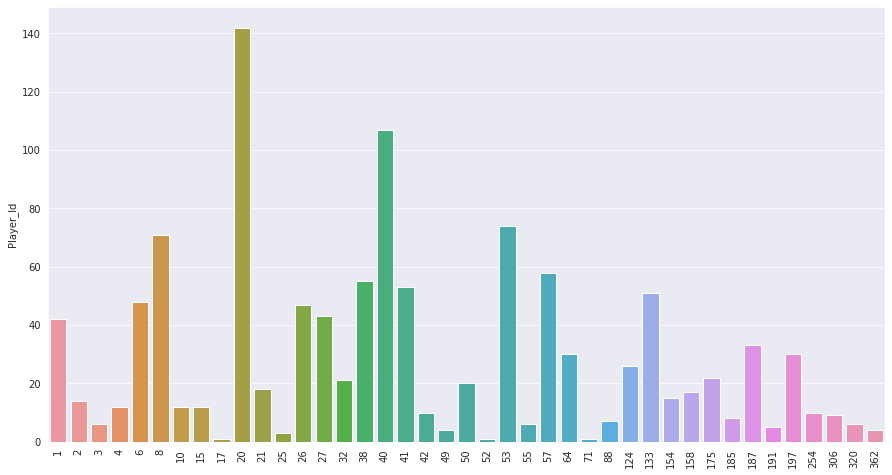

In [23]:
values = cap.Player_Id.value_counts().sort_values(ascending=False).head(50)
labels = values.index
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x=labels, y=values)

In [24]:
captains = player.loc[player['Player_Id'].isin(labels)]['Player_Name']

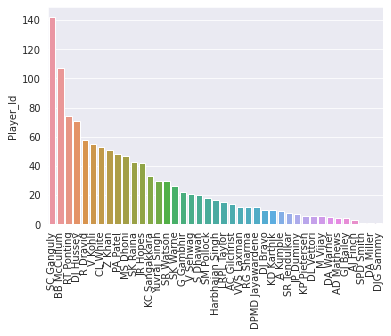

In [25]:
plt.xticks(rotation=90)
sns.barplot(x=captains.values, y=values)

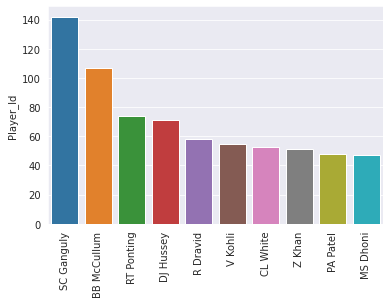

In [26]:
plt.xticks(rotation=90)
sns.barplot(x=captains.values[:10], y=values[:10])

In [27]:
cap

,Match_Id,Player_Id,Team_Id,Is_Keeper,Is_Captain
0,335987,1,1,0,1
5,335987,6,2,0,1
25,335988,20,3,1,1
32,335988,27,4,0,1
52,335989,38,5,0,1
...,...,...,...,...,...
12638,729284,57,7,0,1
12652,729286,88,6,1,1
12658,729286,8,2,0,1
12684,829762,8,2,0,1


In [39]:
winn_cap = pd.merge(cap,match[['Match_Id','Match_Winner_Id']],on='Match_Id',how='left')

In [40]:
winn_cap = winn_cap[winn_cap['Match_Winner_Id']==1]

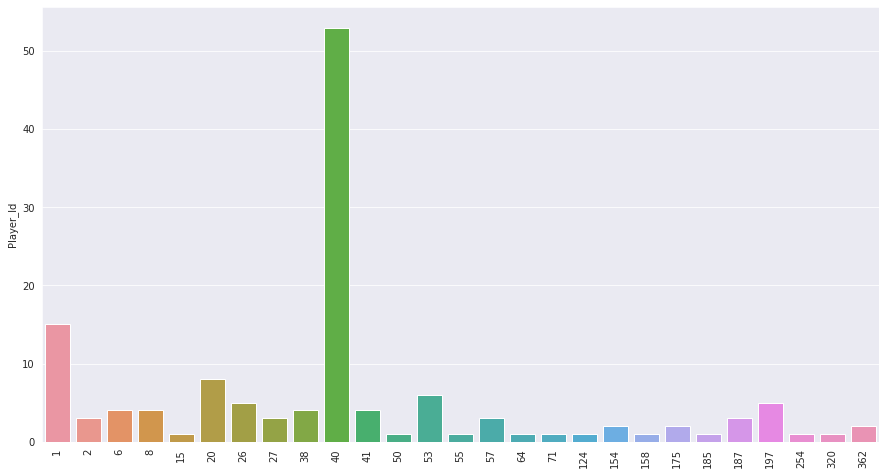

In [41]:
values = winn_cap.Player_Id.value_counts().sort_values(ascending=False).head(50)
labels = values.index
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x=labels, y=values)

In [42]:
winn_cap.shape

(136, 6)

In [43]:
win_captains = player.loc[player['Player_Id'].isin(labels)]['Player_Name']

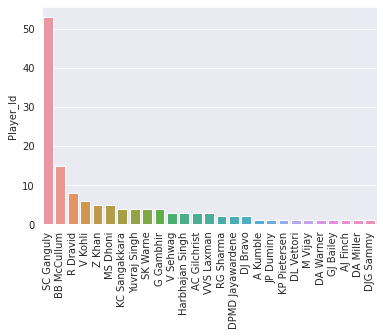

In [46]:
plt.xticks(rotation=90)
sns.barplot(x=win_captains.values, y=values)

In [51]:
winner_1 = match[match['Match_Winner_Id']==1]
winner_2 = match[match['Match_Winner_Id']==2]
winner_3 = match[match['Match_Winner_Id']==3]
winner_4 = match[match['Match_Winner_Id']==4]
winner_5 = match[match['Match_Winner_Id']==5]
winner_6 = match[match['Match_Winner_Id']==6]
winner_7 = match[match['Match_Winner_Id']==7]
winner_8 = match[match['Match_Winner_Id']==8]
winner_9 = match[match['Match_Winner_Id']==9]
winner_10 = match[match['Match_Winner_Id']==10]
winner_11 = match[match['Match_Winner_Id']==11]
winner_12 = match[match['Match_Winner_Id']==12]
winner_13 = match[match['Match_Winner_Id']==13]

In [53]:
import plotly.express as px

fig = px.pie(winner_1,names="Opponent_Team_Id", title='Team 1 winning ')
fig.show()

In [59]:
fig = px.pie(winner_2,names="Opponent_Team_Id", title='Team 2 winning ')
fig.show()

fig = px.pie(winner_3,names="Opponent_Team_Id", title='Team 3 winning ')
fig.show()

fig = px.pie(winner_4,names="Opponent_Team_Id", title='Team 4 winning ')
fig.show()

fig = px.pie(winner_5,names="Opponent_Team_Id", title='Team 5 winning ')
fig.show()

fig = px.pie(winner_6,names="Opponent_Team_Id", title='Team 6 winning ')
fig.show()

fig = px.pie(winner_7,names="Opponent_Team_Id", title='Team 7 winning ')
fig.show()
fig = px.pie(winner_8,names="Opponent_Team_Id", title='Team 8 winning ')
fig.show()
fig = px.pie(winner_9,names="Opponent_Team_Id", title='Team 9 winning ')
fig.show()
fig = px.pie(winner_10,names="Opponent_Team_Id", title='Team 10 winning ')
fig.show()
fig = px.pie(winner_11,names="Opponent_Team_Id", title='Team 11 winning ')
fig.show()
fig = px.pie(winner_12,names="Opponent_Team_Id", title='Team 12 winning ')
fig.show()
fig = px.pie(winner_13,names="Opponent_Team_Id", title='Team 13 winning ')
fig.show()